# Nützliche Notizbücher

Begleit-Code zum Artikel im Entwickler Magazin.
Von Christian Hoffmann und Andreas Dietzel-Windisch.

## Erste Notizschritte

### Kubikzahlen
Die Kubikzahl $c(a)$ einer Zahl $a$ ergibt sich aus $c(a) = a^3$.

Die ersten $n$ Kubikzahlen lassen sich in Python gut durch Listenabstraktion berechnen:

In [1]:
# berechne die ersten n Kubikzahlen
n = 10
numbers = range(1, n+1)
[i**3 for i in numbers]

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

## Rechnungsdigitalisierer

#### Daten
- Eingabe: 
  - Fotos von Rechnungen
  - Regeln zum Extrahieren relevanter Daten
      - Wort "Rechnung"
      - IBAN / BIC
      - Betrag
      - Empfänger
      - Rechnungsnummer o.ä.
- Ausgabe: Eintrag in To-Do-Liste
  - Überweisungsdaten
  - evtl. Rechnungsfoto als Anhang

#### Ablauf
1. Rechnungsfoto laden
2. Texterkennung
3. Relevante Daten extrahieren
4. Eintrag in To-Do-Liste anlegen

### Rechnungsfoto laden

Ziel: Beispielrechnung herunterladen und lokal speichern

In [ ]:
import requests

ModuleNotFoundError?  
Requests-Bibliothek mit conda installieren:  
`conda install requests`

In [2]:
import requests

filename = 'example_invoice.jpg'
url = 'https://public.methodpark.de/eng/exemplary_invoice.png'
response = requests.get(url)
file = open(filename, 'wb')
file.write(response.content)
file.close()

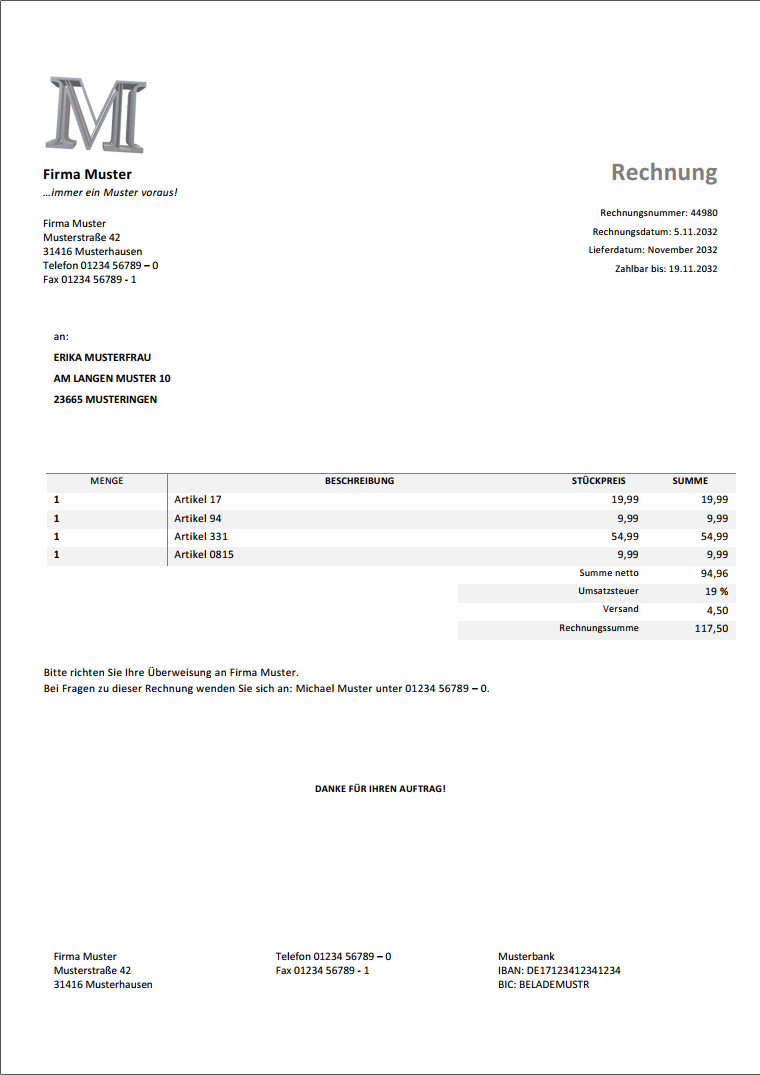

In [3]:
from PIL import Image
Image.open(filename)

### Texterkennung

#### Recherche Bibliotheken

- Mit Machine Learning-Bibliothek selbst anlernen?
- Texterkennungsbibliotheken: [Ocropy](https://github.com/ocropus/ocropy), [Tesseract](https://github.com/tesseract-ocr/tesseract)
- Python-Wrapper für Tesseract: [pytesseract](https://pypi.org/project/pytesseract)

#### Exploration von pytesseract
[Tesseract Doku](https://tesseract-ocr.github.io/tessdoc/Downloads.html):
> Currently, there is no official Windows installer for newer versions.
> 
> 3rd party Windows exe’s/installer
> [UB Mannheim](https://github.com/UB-Mannheim/tesseract/wiki) has installers available for version 3, 4 and current 5.0.0.Alpha.

Ein [aktueller Installer](https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe) für Tesseract ist über die UB Mannheim verfügbar.  
Im Installer zusätzlich das deutsche Sprachpaket "German" auswählen!

In [ ]:
import pytesseract

ModuleNotFoundError?  
Pytesseract über Kanal *conda-forge* importieren:  
`conda install -c conda-forge pytesseract`  
(siehe https://anaconda.org/conda-forge/pytesseract)

In [4]:
import pytesseract
import os

filepath = os.path.join(os.getcwd(), filename)
pytesseract.pytesseract.tesseract_cmd =  os.getenv('LOCALAPPDATA') \
                    + '\\Programs\\Tesseract-OCR\\tesseract.exe'
text = pytesseract.image_to_string(filepath, lang='deu')

In [5]:
text

' \n\nFirma Muster Rechnung\n\n‚Immer ein Muster voraus!\n\nRechnungsnummer: 44980\n\nFirma Muster "\nMusterstraße 42 Rechnungsdatum: 5.11.2032\n31416 Musterhausen Uieferdatum: November 2032\nTelefon 01234 567890 Zahibar bis: 18.11.2032\n\nFax 01234 567891\n\nERIKA MUSTERFRAU\nAM LANGEN MUSTER 10.\n\n \n\n23665 MUSTERINGEN\nMENGE BESCHREIBUNG STückpREIS SUMME\n\nı Artikel 17 1999 19,8\n\nı Artikel 4 E2 6\n\nı Artikel 331 5459 5459\n\nı Artikel 0815 E27 6\n\nSumme netto 9406\n\nUmsatzsteuer 10%\n\nVersand, 450\n\nRechnungssumme 117,50\n\nBitte richten Sie Ihre Überweisung an Firma Muster.\nBei Fragen zu dieser Rechnung wenden Sie sich an: Michael Muster unter 01234 56789 - 0.\n\nDANKE FÜR IHREN AUFTRAG!\nFirma Muster Telefon 01234 56789 -0 Musterbank\nMusterstraße 42 Fax 01234 56789-1 IBAN: DE17123412341234.\n\n31416 Musterhausen BIC: BELADEMUSTR\n\n \n\x0c'

In [6]:
lines = text.split('\n')
for line in lines:
    print(line)

 

Firma Muster Rechnung

‚Immer ein Muster voraus!

Rechnungsnummer: 44980

Firma Muster "
Musterstraße 42 Rechnungsdatum: 5.11.2032
31416 Musterhausen Uieferdatum: November 2032
Telefon 01234 567890 Zahibar bis: 18.11.2032

Fax 01234 567891

ERIKA MUSTERFRAU
AM LANGEN MUSTER 10.

 

23665 MUSTERINGEN
MENGE BESCHREIBUNG STückpREIS SUMME

ı Artikel 17 1999 19,8

ı Artikel 4 E2 6

ı Artikel 331 5459 5459

ı Artikel 0815 E27 6

Summe netto 9406

Umsatzsteuer 10%

Versand, 450

Rechnungssumme 117,50

Bitte richten Sie Ihre Überweisung an Firma Muster.
Bei Fragen zu dieser Rechnung wenden Sie sich an: Michael Muster unter 01234 56789 - 0.

DANKE FÜR IHREN AUFTRAG!
Firma Muster Telefon 01234 56789 -0 Musterbank
Musterstraße 42 Fax 01234 56789-1 IBAN: DE17123412341234.

31416 Musterhausen BIC: BELADEMUSTR

 



### Relevante Daten extrahieren

*TODO:* Robuster Extraktionsmechanismus

Aktuelle Annahmen:
- Foto zeigt eine Rechnung, falls das Wort "Rechnung" enthalten ist
- jegliche extrahierte IBAN ist gültig
- Rechnungsnummer ist markiert als "Rechnungsnummer", "Rechnungsnr." o.ä.
- Rechnungsnummer steht in einer Zeile
- nach der Rechnungsnummer folgen in der Zeile keine weiteren Angaben
- ...

In [7]:
import re

def extract(lines, regex, groupNumber = 0):
    for line in lines:
        match = re.search(regex, line)
        if match:
            return match.group(groupNumber).strip()
    return ''

is_invoice = extract(lines, '.*Rechnung.*') != ''
invoice_number = extract(lines, '(.*Rechnung.*[Nn].*r([.:]*))(.*)', 3)
total = extract(lines, '(.*Rechnungssumme)(.*)', 2)
iban = extract(lines, 'IBAN(.+?)([A-Z][A-Z][0-9\s]*)', 2)
bic = extract(lines, 'BIC(.+?)([A-Z\s]*)', 2)

print('is_invoice:\t', is_invoice)
print('invoice_number:\t', invoice_number)
print('total:\t\t', total)
print('iban:\t\t', iban)
print('bic:\t\t', bic)

is_invoice:	 True
invoice_number:	 44980
total:		 117,50
iban:		 DE17123412341234
bic:		 BELADEMUSTR


### Eintrag in To-Do-Liste anlegen

Installation:
`pip install O365`

Dokumentation:
[python-o365](https://github.com/O365/python-o365)

1. Öffne das [Azure App Registration portal](https://portal.azure.com/#blade/Microsoft_AAD_RegisteredApps/ApplicationsListBlade)
2. Registriere eine neue App  
Name: Invoice-Todo-Bridge  
Who can use this application or access this API: Accounts in any organizational directory (Any Azure AD directory - Multitenant)  
Redirect URI (Web): https://login.microsoftonline.com/common/oauth2/nativeclient
3. Notiere die Application ID
4. Erzeuge ein neues Client Secret unter "Certificates & secrets". Notiere den Wert des Secrets
5. Füge die Microsoft Graph delegeated permission "Task.ReadWrite" unter "API permissions" hinzu


In [ ]:
from O365 import Account
from O365 import MSOffice365Protocol

my_application_id = "..."  # TODO: insert values
my_client_secret = "..."
credentials = (my_application_id, my_client_secret)
account = Account(credentials, protocol=MSOffice365Protocol())
if account.authenticate(scopes=['basic', 'tasks_all']):
   print('Authenticated!')

Um die App-Registrierung wieder zu entfernen, besuche https://myapplications.microsoft.com

In [ ]:
todo = account.tasks()
tasks = todo.get_tasks()
for task in tasks:
    print(task.subject)

In [ ]:
todo = account.tasks()
task = todo.new_task()
task.subject = 'Rechnung überweisen'
task.body = 'Betrag: ' + total + \
            '<br />Verwendungszweck: ' + invoice_number + \
            '<br /><br />IBAN: ' + iban + \
            '<br />BIC: ' + bic + \
            '<br /><br /><br />Quelle: ' + filename
task.save()

In [ ]:
todo = account.tasks()
tasks = todo.get_tasks()
for task in tasks:
    print(task.subject)
    print(task.body)